<a href="https://colab.research.google.com/github/NapoliD/EPAM/blob/main/EDA_Exploratory_Data_Analysis_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# In the case of using google drive
from google.colab import drive
drive.mount('/content/drive/') 


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split


In [ ]:
import os
os.chdir('/content/drive/My Drive/GOOGLE_COLAB/EDA_Exploratry_data_analisis')

In [ ]:
# load dataset
data = pd.read_csv('txhousing.csv')
data.tail()

,city,year,month,sales,volume,median,listings,inventory,date
8597,Wichita Falls,2015,3,152.0,16716584.0,89200.0,818.0,6.8,2015.166667
8598,Wichita Falls,2015,4,129.0,15482194.0,105300.0,760.0,6.4,2015.250000
8599,Wichita Falls,2015,5,174.0,19188181.0,100000.0,776.0,6.4,2015.333333
8600,Wichita Falls,2015,6,143.0,18820752.0,118800.0,770.0,6.2,2015.416667
8601,Wichita Falls,2015,7,172.0,23850905.0,116700.0,811.0,6.5,2015.500000


In [ ]:
data.isnull().mean()

city         0.000000
year         0.000000
month        0.000000
sales        0.066031
volume       0.066031
median       0.071611
listings     0.165543
inventory    0.170542
date         0.000000
dtype: float64

Question 1:¶
How would you verify that the data is complete for each city? (e.g. how do I know that there's no period missing for any of the cities?) Come up with a few of your own criteria for how you would check that

How would you also verify that there is no data input error on any of the features (sales, volume, median, listings, inventory)

In [ ]:
# I analyze each city and the % of null, With this function I can detect missing values in each column and analyzed by city.

_null = []
citys = [x for x in data['city']]
citys=list( dict.fromkeys(citys) )
citys
for x in citys:
  #print(x)
  #print(data[data['city']==x].isnull().mean())
  _null.append(data[data['city']==x].isnull().mean())


citys_=pd.DataFrame(citys)
citys_.columns=['City']

_null = pd.DataFrame(_null)
_null=_null.iloc[:, 1:]
null_data=pd.concat([citys_.reset_index(drop=True),
                      _null.reset_index(drop=True)], axis=1)
null_data

,City,year,month,sales,volume,median,listings,inventory,date
0,Abilene,0.0,0.0,0.000000,0.000000,0.000000,0.005348,0.005348,0.0
1,Amarillo,0.0,0.0,0.000000,0.000000,0.000000,0.026738,0.026738,0.0
2,Arlington,0.0,0.0,0.000000,0.000000,0.000000,0.005348,0.005348,0.0
3,Austin,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,Bay Area,0.0,0.0,0.000000,0.000000,0.000000,0.005348,0.005348,0.0
5,Beaumont,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,Brazoria County,0.0,0.0,0.074866,0.074866,0.074866,0.299465,0.310160,0.0
7,Brownsville,0.0,0.0,0.010695,0.010695,0.010695,0.556150,0.556150,0.0
8,Bryan-College Station,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
9,Collin County,0.0,0.0,0.000000,0.000000,0.000000,0.005348,0.005348,0.0


In [ ]:
len(citys)

46

Question 2:¶
Produce summary statistics for each city for each of the features. Choose summary statistics that you think would be sensible for describing this data.



In [ ]:
#statistics for each city for each of the features for each year
statistics_city=pd.DataFrame(data.loc[:, ['city','year','sales','volume', 'median', 'listings','inventory',]].groupby(['city','year']).agg(['mean','median','min', 'max', 'std'])).reset_index(inplace=False)
statistics_city

city  year       sales                                 \
                                mean median   min    max        std   
0          Abilene  2000  114.583333  102.5  72.0  156.0  26.462524   
1          Abilene  2001  119.250000  117.0  75.0  151.0  22.234801   
2          Abilene  2002  126.333333  133.5  94.0  159.0  23.550076   
3          Abilene  2003  136.000000  137.0  68.0  193.0  31.185661   
4          Abilene  2004  152.500000  152.5  97.0  190.0  26.892040   
..             ...   ...         ...    ...   ...    ...        ...   
731  Wichita Falls  2011  106.250000  111.0  79.0  135.0  19.762798   
732  Wichita Falls  2012  112.416667  115.5  90.0  132.0  14.247541   
733  Wichita Falls  2013  121.250000  122.5  79.0  159.0  26.003933   
734  Wichita Falls  2014  117.000000  111.0  89.0  150.0  21.092868   
735  Wichita Falls  2015  134.428571  143.0  71.0  174.0  37.854357   

           volume                                                   \
             mean      median        min         max           std   
0    9.047917e+06   8587500.0  5380000.0  13910000.0  2.569448e+06   
1    9.530417e+06   8982500.0  5730000.0  13175000.0  2.138483e+06   
2    9.889583e+06  10180000.0  6530000.0  13500000.0  2.249757e+06   
3    1.130625e+07  11407500.0  5385000.0  16230000.0  2.789558e+06   
4    1.330583e+07  12852500.0  6945000.0  19190000.0  3.195404e+06   
..            ...         ...        ...         ...           ...   
731  1.205175e+07  13213379.5  8165777.0  15283189.0  2.515368e+06   
732  1.323308e+07  12777624.5  9695019.0  17792964.0  2.662283e+06   
733  1.485134e+07  15008618.0  9666246.0  19058834.0  3.106454e+06   
734  1.454250e+07  13904428.0  9625728.0  18672368.0  3.130815e+06   
735  1.617505e+07  16716584.0  7519961.0  23850905.0  5.341452e+06   

            median                                               listings  \
              mean    median      min       max           std        mean   
0     66600.000000   67100.0  58100.0   75000.0   5714.415583  750.916667   
1     70975.000000   70050.0  64200.0   86700.0   6331.325439  769.666667   
2     68600.000000   67100.0  59400.0   82200.0   6756.141987  715.750000   
3     71933.333333   71850.0  62300.0   79700.0   5598.105740  726.166667   
4     74866.666667   73200.0  63900.0   91800.0   7892.267025  677.666667   
..             ...       ...      ...       ...           ...         ...   
731   98141.666667  101500.0  73800.0  113600.0  10631.724254  974.833333   
732  100958.333333   99900.0  82100.0  118800.0  12347.282243  896.000000   
733  105000.000000  103600.0  85900.0  121300.0  10383.028110  841.000000   
734  105675.000000  104250.0  90000.0  135300.0  12443.992709  876.666667   
735  100871.428571  100000.0  82100.0  118800.0  13712.246872  794.142857   

                                     inventory                             
    median    min     max        std      mean median  min  max       std  
0    764.5  658.0   794.0  40.288637  6.466667   6.55  5.7  6.9  0.333939  
1    775.5  620.0   891.0  74.343592  6.625000   6.70  5.2  7.7  0.709834  
2    727.5  643.0   778.0  52.404242  5.841667   5.90  5.1  6.5  0.531650  
3    730.5  640.0   778.0  45.022890  5.683333   5.70  4.7  6.2  0.460895  
4    679.5  600.0   752.0  39.688179  4.558333   4.65  3.9  5.1  0.328795  
..     ...    ...     ...        ...       ...    ...  ...  ...       ...  
731  982.0  844.0  1052.0  58.589222  8.616667   8.75  7.8  9.4  0.613238  
732  907.0  801.0   941.0  41.220030  8.208333   8.30  7.1  8.7  0.450168  
733  847.0  743.0   923.0  52.911590  7.133333   7.35  6.1  7.9  0.649942  
734  884.5  746.0   973.0  73.053322  7.441667   7.55  6.1  8.3  0.692109  
735  795.0  760.0   829.0  26.289596  6.614286   6.50  6.2  7.2  0.338765  

[736 rows x 27 columns]

Question 3:¶
Plot all the features by city through time with good labeling (year and month) on the x axis

In [ ]:
#I prepare the data to be processed by city and Year+month
year= (data['year'])
month = str(data['month'])
year=data['year'].astype(str)
month = data['month'].astype(str)
Year_M=pd.DataFrame(year + '-' +month)
Year_M.columns=['Year_M']


In [ ]:
plt_data = pd.concat([data.reset_index(drop=True),
                     Year_M.reset_index(drop=True) ], axis=1)
plt_data=plt_data.loc[:,['city','Year_M','sales','volume','median','listings','inventory']]
plt_data=plt_data.dropna()
plt_data['sales']=plt_data['sales'].astype(int)
plt_data['volume']=plt_data['volume'].astype(int)
plt_data['listings']=plt_data['listings'].astype(int)
plt_data['inventory']=plt_data['inventory'].astype(int)
plt_data['median']=plt_data['median'].astype(int)

plt_data=plt_data

In [ ]:
plt_data.size

49882

Abilene


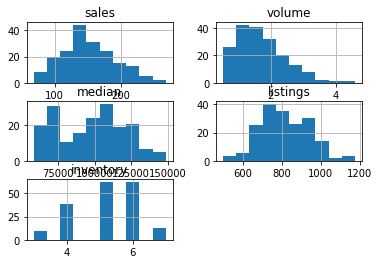

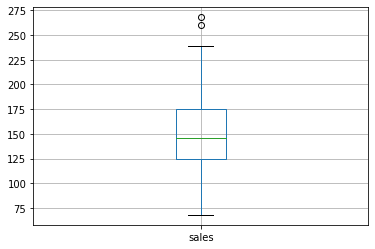

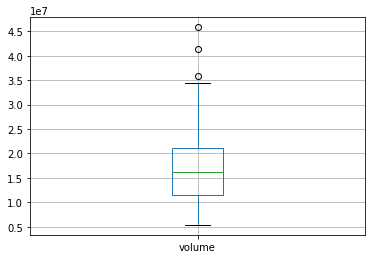

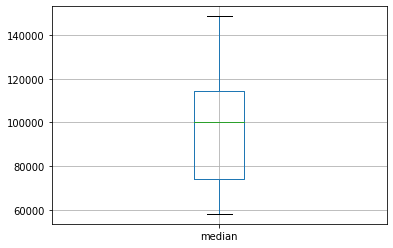

Amarillo


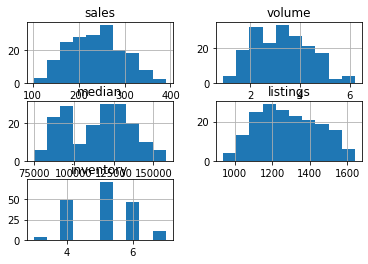

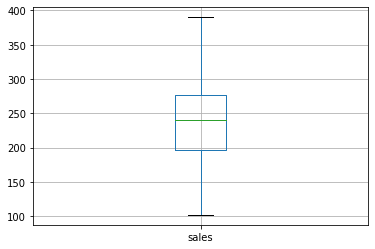

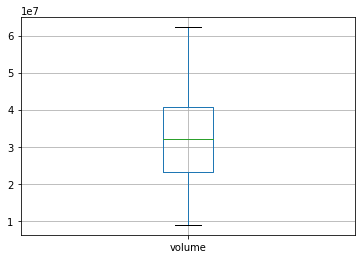

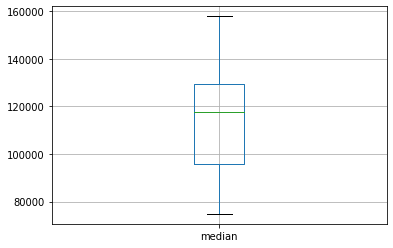

Arlington


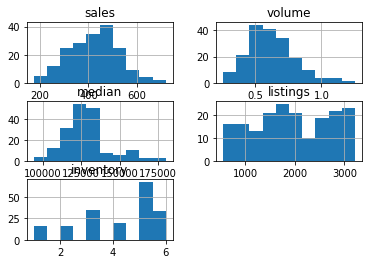

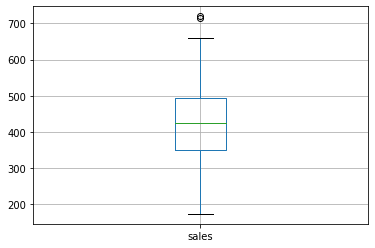

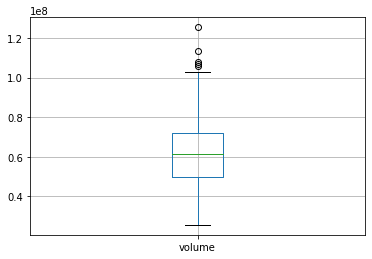

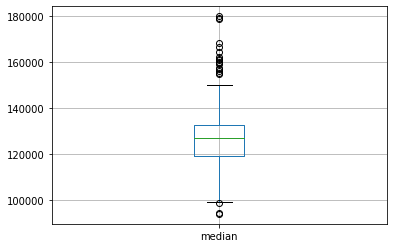

Austin


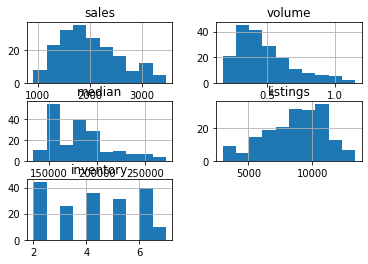

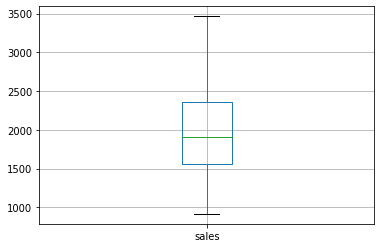

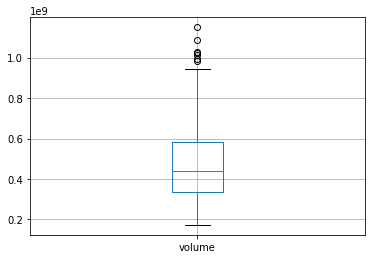

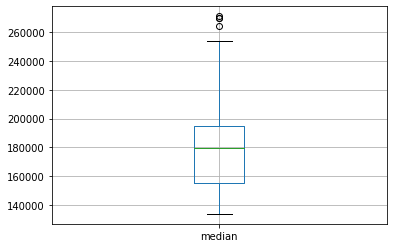

Bay Area


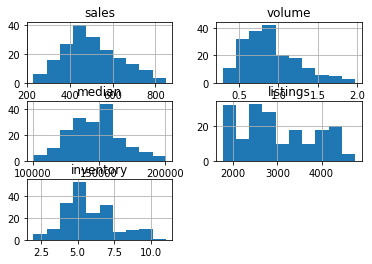

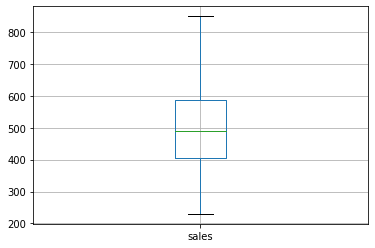

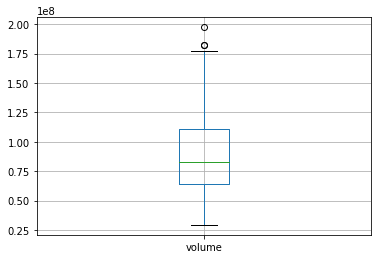

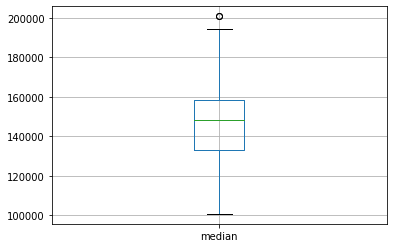

Beaumont


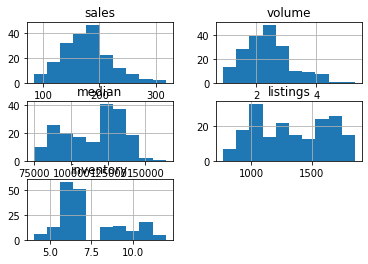

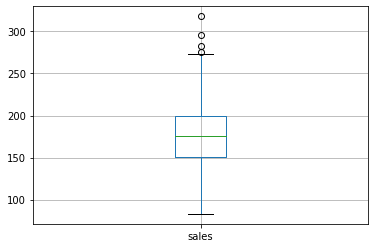

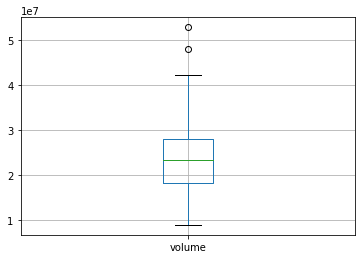

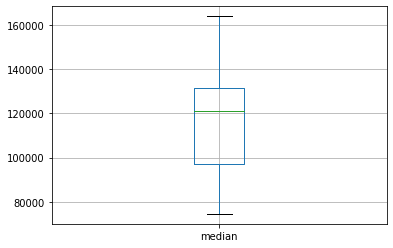

Brazoria County


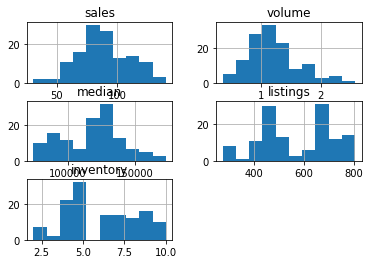

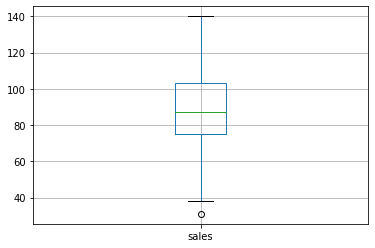

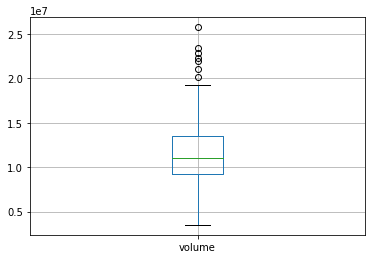

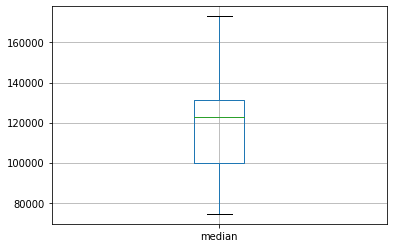

Brownsville


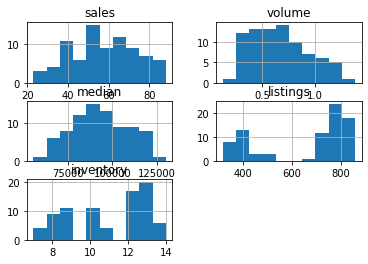

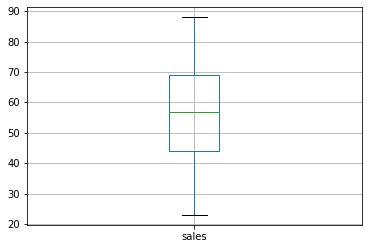

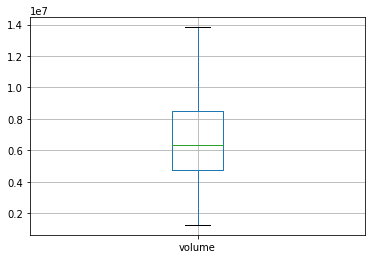

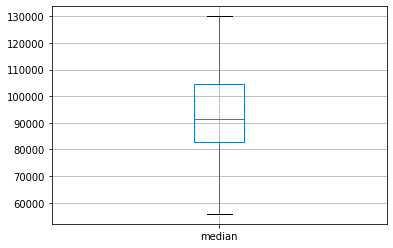

Bryan-College Station


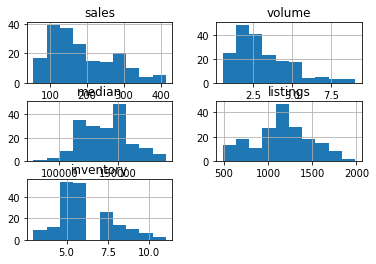

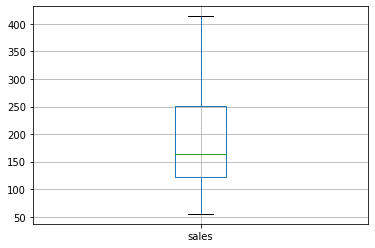

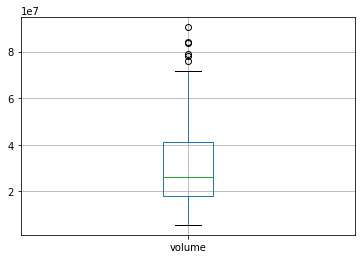

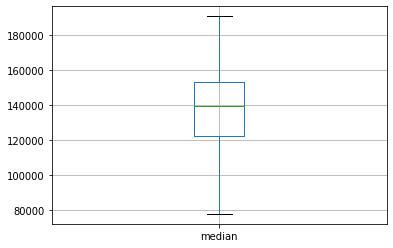

Collin County


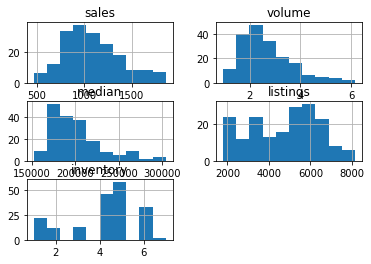

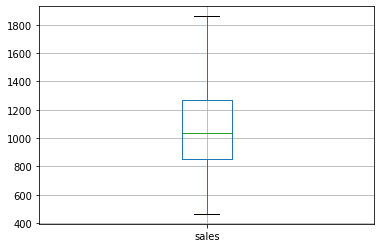

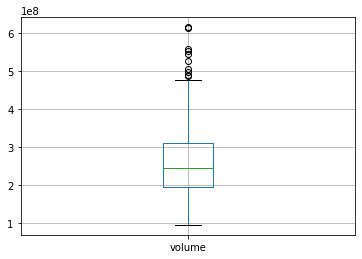

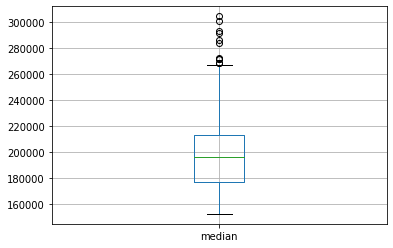

Corpus Christi


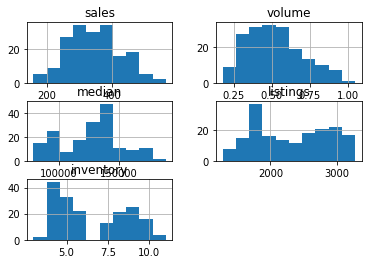

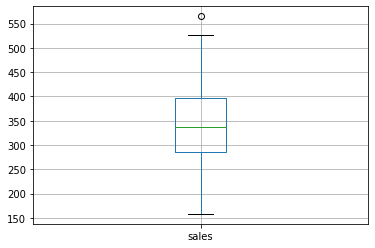

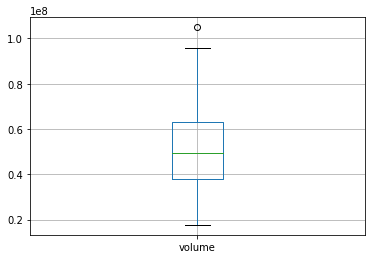

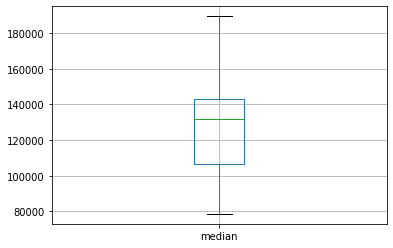

Dallas


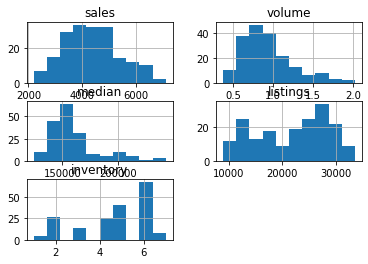

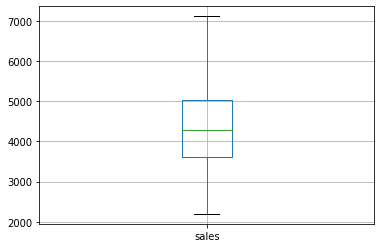

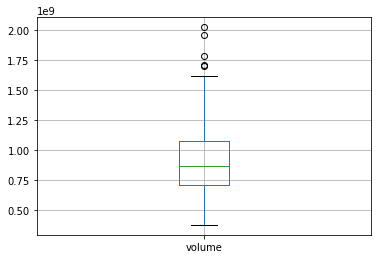

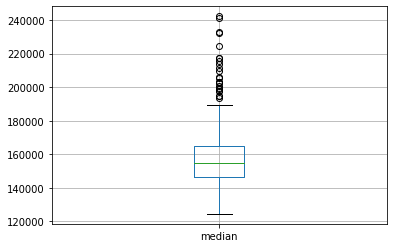

Denton County


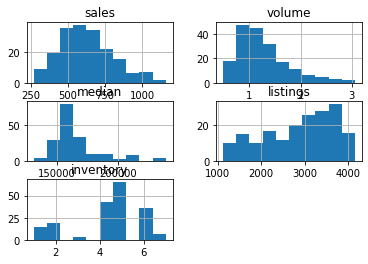

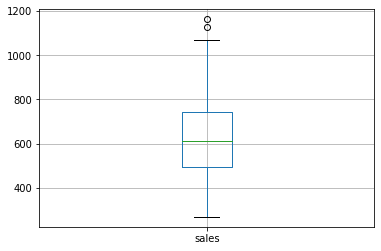

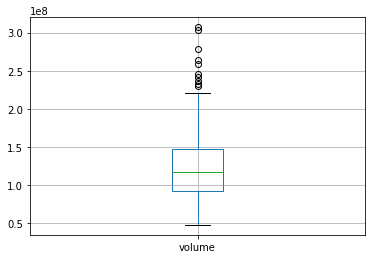

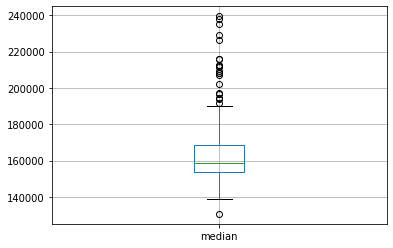

El Paso


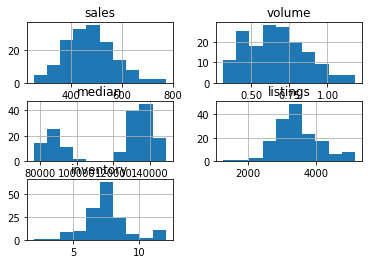

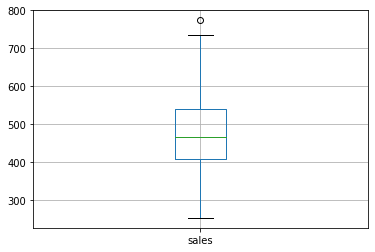

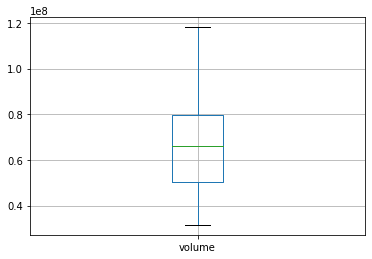

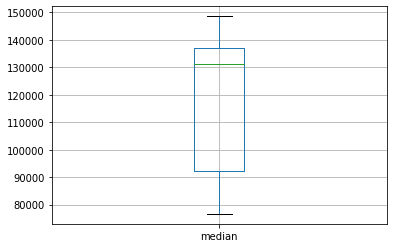

Fort Bend


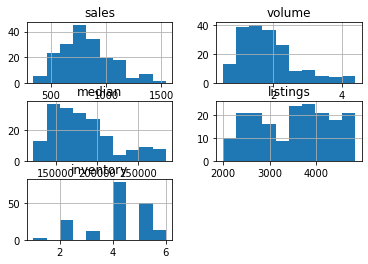

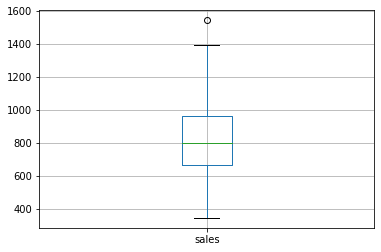

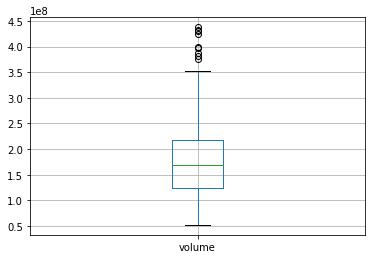

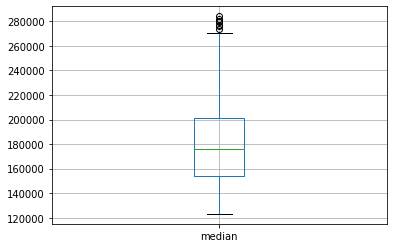

Fort Worth


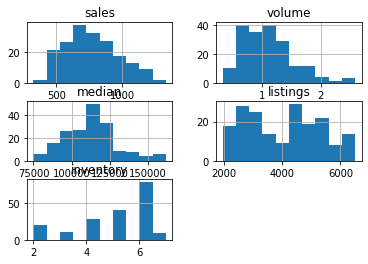

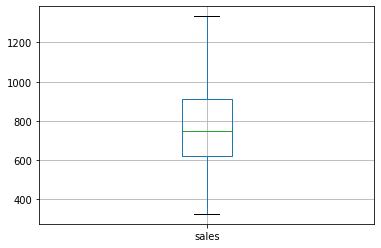

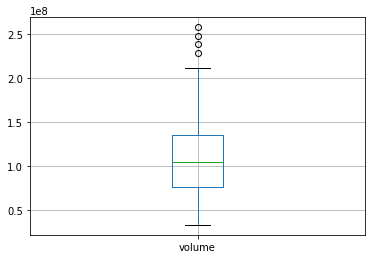

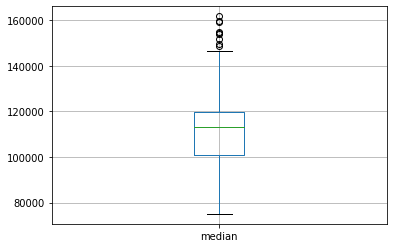

Galveston


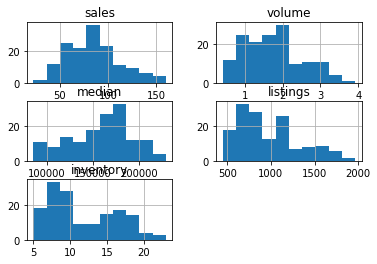

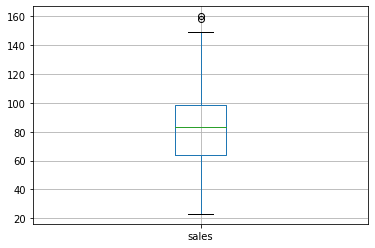

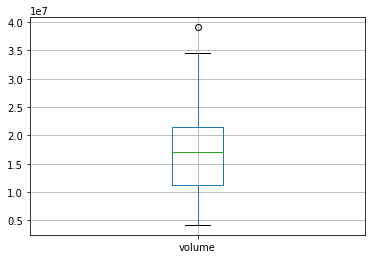

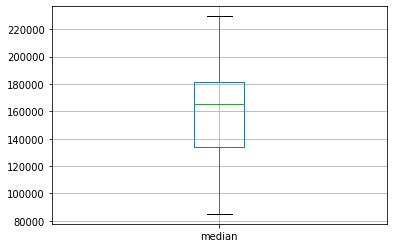

Garland


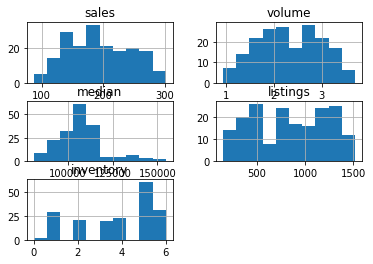

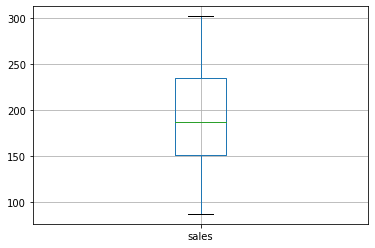

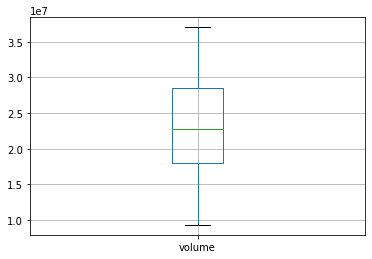

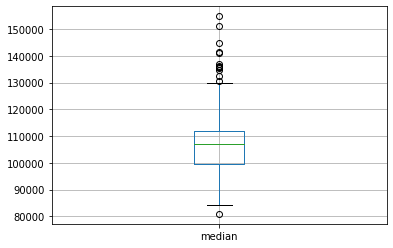

Harlingen


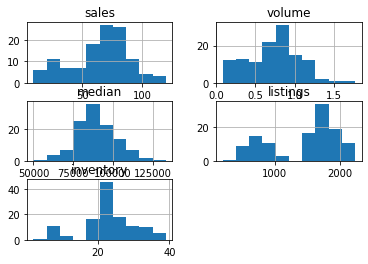

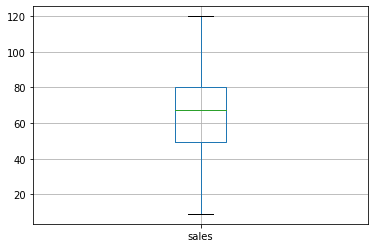

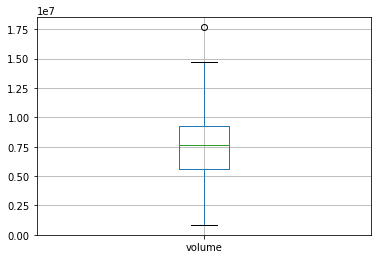

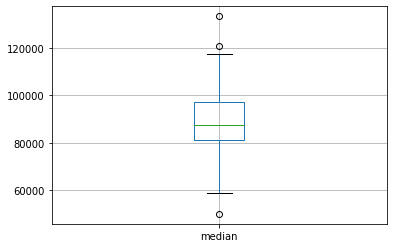

Houston


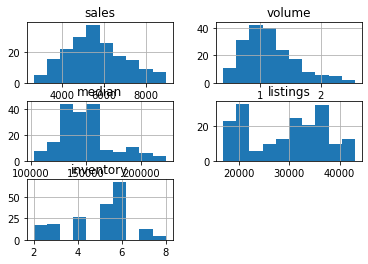

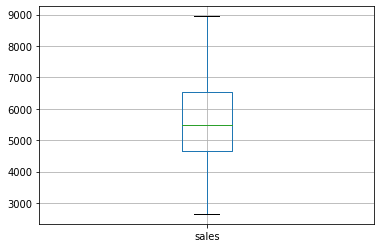

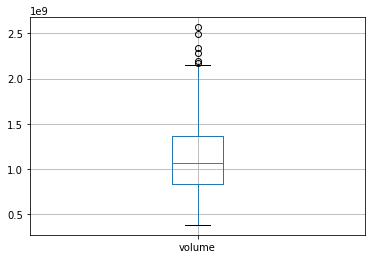

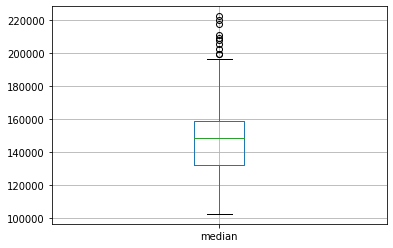

Irving


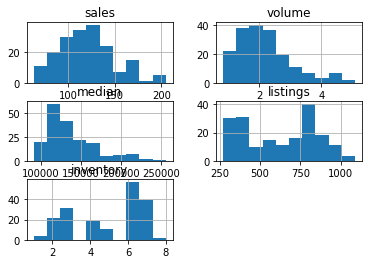

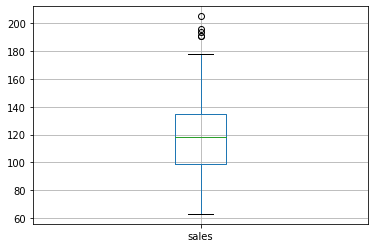

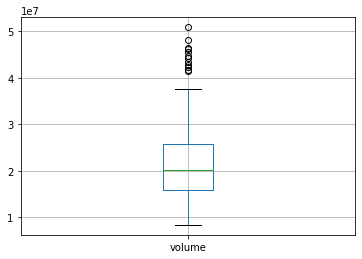

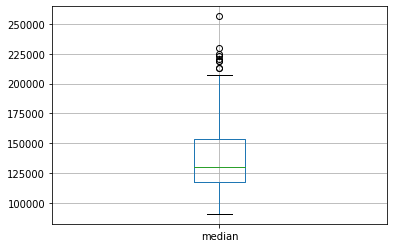

Kerrville


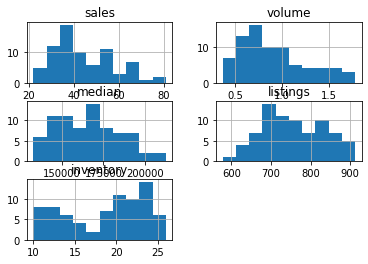

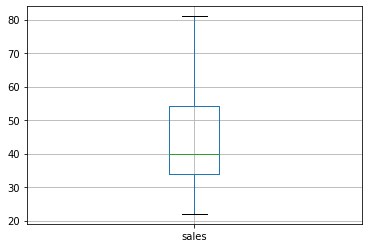

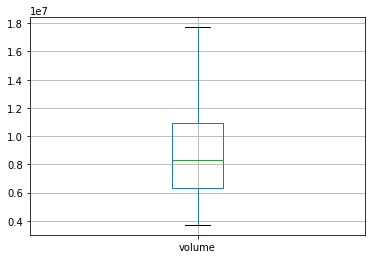

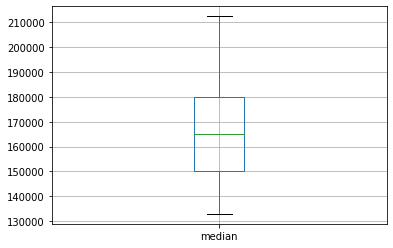

Killeen-Fort Hood


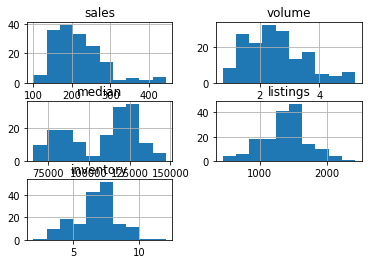

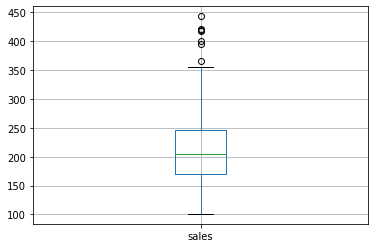

KeyboardInterrupt: ignored

In [ ]:
#This way of graphing consumes less resources
import plotly.express as px

citys = [x for x in data['city']]
citys=list( dict.fromkeys(citys) )
citys
for x in citys:

  plt_data[plt_data['city']==x].hist()
  print(x)
  plt.show()
  print('')
  print('')                   
  plt_data[plt_data['city']==x].boxplot(column=['sales'])
  plt.show()
  plt_data[plt_data['city']==x].boxplot(column=['volume'])
  plt.show()
  plt_data[plt_data['city']==x].boxplot(column=['median'])
  plt.show()

In [ ]:
#This option consumes more graphic resources, I have a laptok with a video card for that reason it is fast.
import plotly.express as px

_null = []
line_plot=plt_data.head(500) # Deactivate this option to make graphs for all cities

#line_plot=plt_data #Activate this option to make graphs for all cities

citys = [x for x in line_plot['city']]
citys=list( dict.fromkeys(citys) )

#citys
for z in citys:
  
  fig = px.line(line_plot[line_plot['city']==z], x="Year_M", y="sales", title=z)
  fig.show()
  fig = px.line(line_plot[line_plot['city']==z], x="Year_M", y="volume")
  fig.show()
  fig = px.line(line_plot[line_plot['city']==z], x="Year_M", y="median")
  fig.show()
  fig = px.line(line_plot[line_plot['city']==z], x="Year_M", y="listings")
  fig.show()



In [ ]:
#Bar plot
#This option consumes more graphic resources, I have a laptok with a video card for that reason it is fast.
_null = []
bar_plot=plt_data.head(500) # Deactivate this option to make graphs for all cities

#bar_plot=plt_data #Activate this option to make graphs for all cities

citys = [x for x in line_plot['city']]
citys=list( dict.fromkeys(citys) )
#citys
for z in citys:
  
  fig = px.bar(bar_plot[bar_plot['city']==z], x="Year_M", y="sales", title=z)
  fig.show()
  fig = px.bar(bar_plot[bar_plot['city']==z], x="Year_M", y="volume")
  fig.show()
  fig = px.bar(bar_plot[bar_plot['city']==z], x="Year_M", y="median")
  fig.show()
  fig = px.bar(bar_plot[bar_plot['city']==z], x="Year_M", y="listings")
  fig.show()  
   

Question 4:¶
For each year and month, find the cities that have the highest volume and listing.

In [ ]:
# The firs 50 rowa
plt_data.sort_values(by=['volume','listings'],ascending=False).head(50) 

,city,Year_M,sales,volume,median,listings,inventory
3739,Houston,2015-7,8945,2568156780,217600,23875,3
3738,Houston,2015-6,8449,2490238594,222400,22311,3
3726,Houston,2014-6,8391,2342443127,211200,19725,2
3727,Houston,2014-7,8391,2278932511,199700,20214,3
3728,Houston,2014-8,8167,2195184825,202400,20007,2
3715,Houston,2013-7,8468,2168720825,187800,21497,3
3725,Houston,2014-5,7877,2154791886,199300,18883,2
3713,Houston,2013-5,8439,2121508529,186100,20526,3
3737,Houston,2015-5,7357,2097957518,220100,21101,3
3716,Houston,2013-8,8155,2083377894,186700,21366,3


In [ ]:
# The last 50 rows
plt_data.sort_values(by=['volume','listings'],ascending=False).tail(50)

,city,Year_M,sales,volume,median,listings,inventory
7040,San Marcos,2010-2,14,2083500,140000,169,9
7054,San Marcos,2011-4,13,2078437,150000,188,9
5671,Nacogdoches,2005-2,36,2070000,54000,214,6
5778,Nacogdoches,2014-1,16,2059270,85000,274,9
6290,Paris,2009-12,20,2045600,80000,272,9
7027,San Marcos,2009-1,13,2040000,138000,149,6
6320,Paris,2012-6,23,2009647,81700,374,13
7041,San Marcos,2010-3,16,2003406,120000,189,10
7072,San Marcos,2012-10,11,1989450,170000,140,8
5634,Nacogdoches,2002-1,21,1985000,65000,66,2


In [ ]:
#all
plt_data.sort_values(by=['volume','listings'],ascending=False)

,city,Year_M,sales,volume,median,listings,inventory
3739,Houston,2015-7,8945,2568156780,217600,23875,3
3738,Houston,2015-6,8449,2490238594,222400,22311,3
3726,Houston,2014-6,8391,2342443127,211200,19725,2
3727,Houston,2014-7,8391,2278932511,199700,20214,3
3728,Houston,2014-8,8167,2195184825,202400,20007,2
...,...,...,...,...,...,...,...
6230,Paris,2004-12,18,1165000,60000,387,9
7060,San Marcos,2011-10,6,1156999,180000,163,8
3372,Harlingen,2000-7,9,1110000,87500,719,30
6303,Paris,2011-1,14,1018825,60000,324,12


Question 5:¶
A data scientist tells you that sales can be predicted as a multiple of the previous month's volume. i.e. sales_t = M * volume_{t-1} She also tells you that M is different for each city. Can you implement this model? Is this a good model?

No, i need the multiplo (M) first, then I can implement it. Because I need the model trained so that I can then apply it and predict

The above formula (sal_t = M * volume_{t-1} ) is similar to that of a simple linear regression.

y= b0 + b1*x1

y= Dependent variable (DP) 

x1 = independent variable (IV)

b1= coefficient 

b0= Constant


I am going to assume that the formula is the same as the one used in Simple Linear Regression to simulate the process

In [ ]:
plt_data

,city,Year_M,sales,volume,median,listings,inventory
0,Abilene,2000-1,72,5380000,71400,701,6
1,Abilene,2000-2,98,6505000,58700,746,6
2,Abilene,2000-3,130,9285000,58100,784,6
3,Abilene,2000-4,98,9730000,68600,785,6
4,Abilene,2000-5,141,10590000,67300,794,6
...,...,...,...,...,...,...,...
8597,Wichita Falls,2015-3,152,16716584,89200,818,6
8598,Wichita Falls,2015-4,129,15482194,105300,760,6
8599,Wichita Falls,2015-5,174,19188181,100000,776,6
8600,Wichita Falls,2015-6,143,18820752,118800,770,6


In [ ]:
plt_data.loc[:,['city','Year_M','volume','sales']][plt_data['city']=='Abilene']

,city,Year_M,volume,sales
0,Abilene,2000-1,5380000,72
1,Abilene,2000-2,6505000,98
2,Abilene,2000-3,9285000,130
3,Abilene,2000-4,9730000,98
4,Abilene,2000-5,10590000,141
...,...,...,...,...
182,Abilene,2015-3,31869437,198
183,Abilene,2015-4,28301159,201
184,Abilene,2015-5,31385757,199
185,Abilene,2015-6,41396230,260


In [ ]:
bar_plot

,city,Year_M,sales,volume,median,listings,inventory
0,Abilene,2000-1,72,5380000,71400,701,6
1,Abilene,2000-2,98,6505000,58700,746,6
2,Abilene,2000-3,130,9285000,58100,784,6
3,Abilene,2000-4,98,9730000,68600,785,6
4,Abilene,2000-5,141,10590000,67300,794,6
...,...,...,...,...,...,...,...
502,Arlington,2010-9,297,44224586,128000,2161,6
503,Arlington,2010-10,280,38596506,127500,1993,5
504,Arlington,2010-11,260,36954226,127100,1905,5
505,Arlington,2010-12,285,41382701,130000,1821,5


In [ ]:
plt_data.loc[:,['city','volume','sales']][plt_data['city']=='Abilene'].iloc[-5:,:-1]

,city,volume
182,Abilene,31869437
183,Abilene,28301159
184,Abilene,31385757
185,Abilene,41396230
186,Abilene,45845730


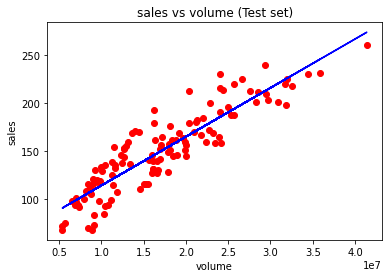

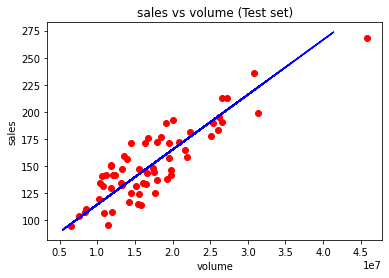

In [ ]:
#Example whit one city
X = plt_data.loc[:,['volume','sales']][plt_data['city']=='Abilene'].iloc[:, :-1]
y = plt_data.loc[:,['volume','sales']][plt_data['city']=='Abilene'].iloc[:, -1]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

# Training the Simple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('sales vs volume (Test set)')
plt.xlabel('volume')
plt.ylabel('sales')
plt.show()

# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('sales vs volume (Test set)')
plt.xlabel('volume')
plt.ylabel('sales')
plt.show()

In [ ]:
plt_data.isnull().mean()

city         0.0
Year_M       0.0
sales        0.0
volume       0.0
median       0.0
listings     0.0
inventory    0.0
dtype: float64

I am going to assume that the formula is the same as the one used in Simple Linear Regression to simulate the process and assemble the pipeline

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
len(citys)

3

In [ ]:
citys = [x for x in plt_data['city']]
citys=list( dict.fromkeys(citys) )
citys
prediccion=[]
y_test=[]
regressor = LinearRegression()


for z in citys:
  
  X = plt_data.loc[:,['volume','sales']][plt_data['city']==z].iloc[:-1, :-1]
  y = plt_data.loc[:,['volume','sales']][plt_data['city']==z].iloc[:-1, -1]
  X_test=pd.DataFrame(plt_data.loc[:,['volume','sales']][plt_data['city']==z].iloc[-1:, -1])
  y_test.append(plt_data.loc[:,['volume','sales']][plt_data['city']==z].iloc[-1:, -1])
  regressor.fit(X, y)
  

  # Predicting the Test set results
  model1=regressor.predict(X_test)
  entrena=pd.DataFrame(model1)
  entrena.columns=['sales_predict']
  
  prediccion.append(entrena)

datos_inicio=pd.DataFrame(prediccion[0])
datos_test=pd.DataFrame(y_test[0])

In [ ]:
datos_inicio

In [ ]:
loop=[1,2,3]
for i in range(len(pd.unique(data_valor['city']))):
  
  datos_inicio=datos_inicio.append(pd.DataFrame(prediccion[i]),ignore_index = True)
  datos_test=datos_test.append(pd.DataFrame(y_test[i]),ignore_index = True)
  #datos_finales=pd.concat(datos_inicio.reset_index(drop=True),pd.DataFrame(prediccion[i]).reset_index(drop=True))
#data_valor.shape

In [ ]:

#datos_inicio

Predict=pd.concat([pd.DataFrame(citys).reset_index(drop=True),
                      datos_inicio.reset_index(drop=True), datos_test.reset_index(drop=True) ], axis=1)
Predict

The results are not good because the objective was to show how training and predict per city is applied. I would use the same method to train each city and apply the Time Series Forecasting FbProphet algorithm.

Question 6:¶
Is there seasonality in the features? Can you demonstrate that there is seasonality?

In [ ]:
tabla=plt_data.pivot_table(index='city',columns='Year_M',aggfunc=np.count_nonzero,fill_value=0)
tabla=tabla.reset_index()
city=pd.DataFrame(tabla['city'])
tabla2=pd.DataFrame(tabla['sales'])
df3 = pd.concat([city,tabla2],axis=1,ignore_index=True)

In [ ]:
df3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,Abilene,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,Amarillo,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,Arlington,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,Austin,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,Bay Area,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,Beaumont,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,Brazoria County,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
7,Brownsville,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
8,Bryan-College Station,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1

With more time I could build a function to count the months with no sales. But in the matrix it can be seen in 1 marked when sale >0 and 0 when sale is 0 or null. In this particular case it would be possible to create rules determining the fall in sales. In addition it should be accompanied with the interpretation of the following graphs

In [ ]:
#This option consumes more graphic resources, I have a laptok with a video card for that reason it is fast.
import plotly.express as px

_null = []
line_plot=plt_data.head(500) # Deactivate this option to make graphs for all cities

#line_plot=plt_data #Activate this option to make graphs for all cities

citys = [x for x in line_plot['city']]
citys=list( dict.fromkeys(citys) )

#citys
for z in citys:
  
  fig = px.line(line_plot[line_plot['city']==z], x="Year_M", y="sales", title=z)
  fig.show()
  fig = px.line(line_plot[line_plot['city']==z], x="Year_M", y="volume")
  fig.show()
  fig = px.line(line_plot[line_plot['city']==z], x="Year_M", y="median")
  fig.show()
  fig = px.line(line_plot[line_plot['city']==z], x="Year_M", y="listings")
  fig.show()